# Data Cleaning for Machine Learning Model Training

This notebook is focused on cleaning the preprocessing dataset (preprocessing was done in `data_cleaning_for_database.ipynb`) to prepare it for EDA and machine learning model training. The primary goal is to ensure that the data is well-structured, accurate, and suitable for building robust and reliable models. The key tasks include:

- Handling missing values: Identifying and appropriately addressing missing or incomplete data.
- Dropping columns that wont be used 
- Feature engineering: Creating new features or transforming existing ones to enhance model performance.

By the end of this notebook, we will have:

- A cleaned and preprocessed dataset ready for model training
- Well-defined features that improve the predictive power of machine learning models

In [30]:
# Standard libraries
import pandas as pd

# Enable auto-reload for modules during development
%load_ext autoreload
%autoreload 2

# Set display options for Pandas to show all columns
pd.set_option('display.max_columns', None)

# Load custom scripts

# Import the scripts
from scripts import data_check as ch
from scripts import data_cleaning as dc
from scripts import visualizations as vis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
# Load dataset pre-cleaned for the database processing
path = "../data/orders_cleaned_db.csv"
orders = pd.read_csv(path)

In [32]:
# First look at the first few rows of the dataset
orders.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,2018-01-31 22:56:00,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-02-03 22:56:00,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,2018-01-13 12:27:00,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-18 12:27:00,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,2018-01-13 12:06:00,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-17 12:06:00,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,2018-01-13 11:45:00,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-16 11:45:00,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,2018-01-13 11:24:00,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-15 11:24:00,Standard Class


<span style="color:red;">In `data_cleaning_for_database` was found:</span>

- There are 53 columns and 180,519 rows.
- There are no duplicated rows.
- `Customer Emails` and `Passwords` are encoded, so these columns can be dropped.
- The `Product descriptions` column all values are missing, this column can be dropped.
- The `Product image` column can be dropped.
- The `Product Status` column has all values set to 0 (indicating available products), so it can be dropped.
- There are 8 `Customer Lname` missing but this wont affect the analysis since this column wont be probably used.
- `Order Zipcode` is missing 86% of the data, so the column will be drop.

In [33]:
# Lets make a copy of the dataset to work with
df = orders.copy()

In [34]:
# Cleaning the dataset based on previous findings
df = dc.clean(df)

In [35]:
# Looking the first rows
df.head()

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,category_name,customer_city,customer_country,customer_id,customer_segment,customer_state,customer_zipcode,department_id,department_name,latitude,longitude,market,order_city,order_country,order_customer_id,order_date,order_id,order_item_cardprod_id,order_item_discount,order_item_discount_rate,order_item_id,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,order_item_total,order_profit_per_order,order_region,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date,shipping_mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,725,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,2018-01-31 22:56:00,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,2018-02-03 22:56:00,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,725,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,2018-01-13 12:27:00,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,2018-01-18 12:27:00,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,95125,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,2018-01-13 12:06:00,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,2018-01-17 12:06:00,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,90027,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,2018-01-13 11:45:00,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,2018-01-16 11:45:00,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,725,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,2018-01-13 11:24:00,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,2018-01-15 11:24:00,Standard Class


In [36]:
# Checking the data after cleaning
ch.check(df)

Number of columns: 44 and rows: 180516

Data types:
type                                   object
days_for_shipping_real                  int64
days_for_shipment_scheduled             int64
benefit_per_order                     float64
sales_per_customer                    float64
delivery_status                        object
late_delivery_risk                      int64
category_id                             int64
category_name                          object
customer_city                          object
customer_country                       object
customer_id                             int64
customer_segment                       object
customer_state                         object
customer_zipcode                        int64
department_id                           int64
department_name                        object
latitude                              float64
longitude                             float64
market                                 object
order_city                  

In [37]:
#Lets divide in numerical and categorical columns, but first order by date since we are going to use it for the EDA analysis
df.sort_values(by='order_date', ascending=True, inplace=True)
numerical = df.select_dtypes(include=['int64', 'float64', 'datetime64[ns]'])
categorical = df.select_dtypes(include=['object'])
numerical.reset_index(drop=True, inplace=True)
categorical.reset_index(drop=True, inplace=True)

In [38]:
# Checking the first rows of the numerical columns
numerical.head()

,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,late_delivery_risk,category_id,customer_id,customer_zipcode,department_id,latitude,longitude,order_customer_id,order_date,order_id,order_item_cardprod_id,order_item_discount,order_item_discount_rate,order_item_id,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,order_item_total,order_profit_per_order,product_card_id,product_category_id,product_price,shipping_date
0,2,4,88.790001,239.979996,0,43,11599,28601,7,35.776661,-81.362625,11599,2015-01-01 00:00:00,1,957,60.0,0.20,1,299.980011,0.37,1,299.980011,239.979996,88.790001,957,43,299.980011,2015-01-03 00:00:00
1,3,4,36.470001,107.889999,0,18,256,60625,4,41.832722,-87.980484,256,2015-01-01 00:21:00,2,403,22.1,0.17,4,129.990005,0.34,1,129.990005,107.889999,36.470001,403,18,129.990005,2015-01-04 00:21:00
2,3,4,91.180000,193.990005,0,48,256,60625,7,41.832722,-87.980484,256,2015-01-01 00:21:00,2,1073,6.0,0.03,2,199.990005,0.47,1,199.990005,193.990005,91.180000,1073,48,199.990005,2015-01-04 00:21:00
3,3,4,68.250000,227.500000,0,24,256,60625,5,41.832722,-87.980484,256,2015-01-01 00:21:00,2,502,22.5,0.09,3,50.000000,0.30,5,250.000000,227.500000,68.250000,502,24,50.000000,2015-01-04 00:21:00
4,5,4,4.100000,40.980000,1,40,8827,78240,6,29.520010,-98.637413,8827,2015-01-01 01:03:00,4,897,9.0,0.18,5,24.990000,0.10,2,49.980000,40.980000,4.100000,897,40,24.990000,2015-01-06 01:03:00


# Findings in the numerical columns:

- `saler_per_customer` and `order_item_total` ,`benefir_per_order` and `order_profit_per_order` and `order_item_product_price` and `product_price` are the same column so one will be dropped
- `id` columns will be keep for grouping, but some are the same and will be dropped, like `customer_id`, `order_customer_id`, `order_item_cardprod_id`, `product_card_id`, `product_category_id` and `category id`
- New features can be created from `order_date` and `shipping_date`

In [39]:
# Drop some of the duplicated rows and id columns (id columns are kept in one dataframe for the EDA analysis)
numerical_with_id = dc.drop_col(numerical, ['order_item_total', 'order_profit_per_order', 'order_item_product_price', 'order_customer_id', 'product_category_id', 'order_item_cardprod_id'])
numerical = dc.drop_col(numerical_with_id, ['category_id', 'customer_id', 'department_id', 'order_id', 'order_item_id', 'product_card_id'])
print(f"Now we have {numerical.shape[1]} numerical columns")
    

Now we have 16 numerical columns


In [40]:
# Adding a new feature, the shipping delay 
numerical = dc.shipping_delay(numerical)
print(f"Now we have {numerical.shape[1]} numerical columns")

Now we have 17 numerical columns


In [41]:
# Processing the order datetime column, to hour, day, month, year and day of the week, and drop the original column. Day of the week will be transformed into a numerical column, starting from 1 for Monday.
# For the shipping date we will do the same as for the order date.
numerical = dc.preprocess_datetime(numerical, ['order_date', 'shipping_date'])
print(f"Now we have {numerical.shape[1]} numerical columns")

Now we have 27 numerical columns


In [42]:
# Looking the first rows of the numerical columns after the processing
numerical.head()

,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,late_delivery_risk,customer_zipcode,latitude,longitude,order_date,order_item_discount,order_item_discount_rate,order_item_profit_ratio,order_item_quantity,sales,product_price,shipping_date,shipping_delay,year_order,hour_order,day_order,month_order,day_of_week_order,year_shipping,hour_shipping,day_shipping,month_shipping,day_of_week_shipping
0,2,4,88.790001,239.979996,0,28601,35.776661,-81.362625,2015-01-01 00:00:00,60.0,0.20,0.37,1,299.980011,299.980011,2015-01-03 00:00:00,-2,2015,0,1,1,4,2015,0,3,1,6
1,3,4,36.470001,107.889999,0,60625,41.832722,-87.980484,2015-01-01 00:21:00,22.1,0.17,0.34,1,129.990005,129.990005,2015-01-04 00:21:00,-1,2015,0,1,1,4,2015,0,4,1,7
2,3,4,91.180000,193.990005,0,60625,41.832722,-87.980484,2015-01-01 00:21:00,6.0,0.03,0.47,1,199.990005,199.990005,2015-01-04 00:21:00,-1,2015,0,1,1,4,2015,0,4,1,7
3,3,4,68.250000,227.500000,0,60625,41.832722,-87.980484,2015-01-01 00:21:00,22.5,0.09,0.30,5,250.000000,50.000000,2015-01-04 00:21:00,-1,2015,0,1,1,4,2015,0,4,1,7
4,5,4,4.100000,40.980000,1,78240,29.520010,-98.637413,2015-01-01 01:03:00,9.0,0.18,0.10,2,49.980000,24.990000,2015-01-06 01:03:00,1,2015,1,1,1,4,2015,1,6,1,2


In [43]:
# Checking the numerical data after cleaning
ch.check(numerical)

Number of columns: 27 and rows: 180516

Data types:
days_for_shipping_real                  int64
days_for_shipment_scheduled             int64
benefit_per_order                     float64
sales_per_customer                    float64
late_delivery_risk                      int64
customer_zipcode                        int64
latitude                              float64
longitude                             float64
order_date                     datetime64[ns]
order_item_discount                   float64
order_item_discount_rate              float64
order_item_profit_ratio               float64
order_item_quantity                     int64
sales                                 float64
product_price                         float64
shipping_date                  datetime64[ns]
shipping_delay                          int64
year_order                              int32
hour_order                              int32
day_order                               int32
month_order                 

In [44]:
# Let's drop other columns that are not useful for the ML analysis that might cause data leakage or are not useful for the ML analysis
#numerical_for_ml = dc.drop_col(numerical, ['days_for_shipping_real', 'days_for_shipment_scheduled', 'shipping_delay', 'order_date', 'shipping_date', 'year_shipping', 'hour_shipping', 'month_shipping', 'day_shipping', 'day_of_week_shipping', 'sales'])
numerical_for_ml = dc.drop_col(numerical, ['days_for_shipping_real', 'shipping_delay', 'order_date', 'shipping_date', 'year_shipping', 'hour_shipping', 'month_shipping', 'day_shipping', 'day_of_week_shipping', 'sales'])

In [45]:
# Saving the numerical columns in a dataframe
numerical.to_csv("../data/numerical.csv", index=False)
numerical_with_id.to_csv("../data/numerical_with_id.csv", index=False)

In [46]:
# Checking the first rows of the categorical columns
categorical.head()

,type,delivery_status,category_name,customer_city,customer_country,customer_segment,customer_state,department_name,market,order_city,order_country,order_region,order_state,order_status,product_name,shipping_mode
0,CASH,Advance shipping,Camping & Hiking,Hickory,EE. UU.,Consumer,NC,Fan Shop,LATAM,Mexico City,México,Central America,Distrito Federal,CLOSED,Diamondback Women's Serene Classic Comfort Bi,Standard Class
1,PAYMENT,Advance shipping,Men's Footwear,Chicago,EE. UU.,Consumer,IL,Apparel,LATAM,Dos Quebradas,Colombia,South America,Risaralda,PENDING_PAYMENT,Nike Men's CJ Elite 2 TD Football Cleat,Standard Class
2,PAYMENT,Advance shipping,Water Sports,Chicago,EE. UU.,Consumer,IL,Fan Shop,LATAM,Dos Quebradas,Colombia,South America,Risaralda,PENDING_PAYMENT,Pelican Sunstream 100 Kayak,Standard Class
3,PAYMENT,Advance shipping,Women's Apparel,Chicago,EE. UU.,Consumer,IL,Golf,LATAM,Dos Quebradas,Colombia,South America,Risaralda,PENDING_PAYMENT,Nike Men's Dri-FIT Victory Golf Polo,Standard Class
4,CASH,Late delivery,Accessories,San Antonio,EE. UU.,Home Office,TX,Outdoors,LATAM,Dos Quebradas,Colombia,South America,Risaralda,CLOSED,Team Golf New England Patriots Putter Grip,Standard Class


In [47]:
ch.check(categorical)

Number of columns: 16 and rows: 180516

Data types:
type                object
delivery_status     object
category_name       object
customer_city       object
customer_country    object
customer_segment    object
customer_state      object
department_name     object
market              object
order_city          object
order_country       object
order_region        object
order_state         object
order_status        object
product_name        object
shipping_mode       object
dtype: object

Unique values count:
type                   4
delivery_status        4
category_name         50
customer_city        562
customer_country       2
customer_segment       3
customer_state        44
department_name       11
market                 5
order_city          3597
order_country        164
order_region          23
order_state         1089
order_status           9
product_name         118
shipping_mode          4
dtype: int64

These columns appear to be categorical (less than 20 unique values

In [48]:
# Drop some categorical columns that wont be used in the analysis because can't be encoded, are not relevant for the shipping, price and the ones that might cause data leakage for the models.
categorical_for_ml = dc.drop_col(categorical, ['delivery_status', 'category_name', 'customer_city', 'customer_state', 'order_city', 'order_country', 'order_state', 'order_status', 'product_name', 'order_region'])
# categorical_for_ml = dc.drop_col(categorical, ['delivery_status', 'category_name', 'customer_city', 'customer_state', 'order_city', 'order_country', 'order_state', 'order_status', 'product_name', 'order_region', 'department_name'])
print(f"Now we have {categorical_for_ml.shape[1]} categorical columns: {categorical_for_ml.columns.tolist()}")

Now we have 6 categorical columns: ['type', 'customer_country', 'customer_segment', 'department_name', 'market', 'shipping_mode']


In [49]:
# Checking the numerical data after processing
ch.check(categorical_for_ml)

Number of columns: 6 and rows: 180516

Data types:
type                object
customer_country    object
customer_segment    object
department_name     object
market              object
shipping_mode       object
dtype: object

Unique values count:
type                 4
customer_country     2
customer_segment     3
department_name     11
market               5
shipping_mode        4
dtype: int64

These columns appear to be categorical (less than 20 unique values):
Index(['type', 'customer_country', 'customer_segment', 'department_name',
       'market', 'shipping_mode'],
      dtype='object')

Unique value count for categorical columns:

type
DEBIT       69293
TRANSFER    49883
PAYMENT     41724
CASH        19616
Name: count, dtype: int64

customer_country
EE. UU.        111143
Puerto Rico     69373
Name: count, dtype: int64

customer_segment
Consumer       93502
Corporate      54788
Home Office    32226
Name: count, dtype: int64

department_name
Fan Shop              66861
Apparel   

In [50]:
# One hot encoding the categorical columns and renaming
categorical_encoded = pd.get_dummies(categorical_for_ml) * 1
categorical_encoded = dc.snake(categorical_encoded)

In [51]:
# A look at the first rows of the encoded categorical columns
categorical_encoded.head()


,type_cash,type_debit,type_payment,type_transfer,customer_country_ee._uu.,customer_country_puerto_rico,customer_segment_consumer,customer_segment_corporate,customer_segment_home_office,department_name_apparel,department_name_book_shop,department_name_discs_shop,department_name_fan_shop,department_name_fitness,department_name_footwear,department_name_golf,department_name_health_and_beauty_,department_name_outdoors,department_name_pet_shop,department_name_technology,market_africa,market_europe,market_latam,market_pacific_asia,market_usca,shipping_mode_first_class,shipping_mode_same_day,shipping_mode_second_class,shipping_mode_standard_class
0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [52]:
# Checking the categorical data after encoding
ch.check(categorical_encoded)

Number of columns: 29 and rows: 180516

Data types:
type_cash                             int64
type_debit                            int64
type_payment                          int64
type_transfer                         int64
customer_country_ee._uu.              int64
customer_country_puerto_rico          int64
customer_segment_consumer             int64
customer_segment_corporate            int64
customer_segment_home_office          int64
department_name_apparel               int64
department_name_book_shop             int64
department_name_discs_shop            int64
department_name_fan_shop              int64
department_name_fitness               int64
department_name_footwear              int64
department_name_golf                  int64
department_name_health_and_beauty_    int64
department_name_outdoors              int64
department_name_pet_shop              int64
department_name_technology            int64
market_africa                         int64
market_europe           

In [53]:
# Saving the categorical columns in a dataframe
categorical.to_csv("../data/categorical.csv", index=False)
#categorical_encoded.to_csv("../data/categorical_for_ml.csv", index=False)

In [54]:
# Lets merge the numerical and categorical columns for the Classification ML analysis
df_ml = pd.concat([numerical_for_ml, categorical_encoded], axis=1)
print(f"For the ML models training there are {df_ml.shape[1] - 1} features and 1 target column")
df_ml.head()

For the ML models training there are 45 features and 1 target column


,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,late_delivery_risk,customer_zipcode,latitude,longitude,order_item_discount,order_item_discount_rate,order_item_profit_ratio,order_item_quantity,product_price,year_order,hour_order,day_order,month_order,day_of_week_order,type_cash,type_debit,type_payment,type_transfer,customer_country_ee._uu.,customer_country_puerto_rico,customer_segment_consumer,customer_segment_corporate,customer_segment_home_office,department_name_apparel,department_name_book_shop,department_name_discs_shop,department_name_fan_shop,department_name_fitness,department_name_footwear,department_name_golf,department_name_health_and_beauty_,department_name_outdoors,department_name_pet_shop,department_name_technology,market_africa,market_europe,market_latam,market_pacific_asia,market_usca,shipping_mode_first_class,shipping_mode_same_day,shipping_mode_second_class,shipping_mode_standard_class
0,4,88.790001,239.979996,0,28601,35.776661,-81.362625,60.0,0.20,0.37,1,299.980011,2015,0,1,1,4,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,4,36.470001,107.889999,0,60625,41.832722,-87.980484,22.1,0.17,0.34,1,129.990005,2015,0,1,1,4,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,4,91.180000,193.990005,0,60625,41.832722,-87.980484,6.0,0.03,0.47,1,199.990005,2015,0,1,1,4,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,4,68.250000,227.500000,0,60625,41.832722,-87.980484,22.5,0.09,0.30,5,50.000000,2015,0,1,1,4,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4,4,4.100000,40.980000,1,78240,29.520010,-98.637413,9.0,0.18,0.10,2,24.990000,2015,1,1,1,4,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [55]:
# Last check before saving the dataframe
ch.check(df_ml)

Number of columns: 46 and rows: 180516

Data types:
days_for_shipment_scheduled             int64
benefit_per_order                     float64
sales_per_customer                    float64
late_delivery_risk                      int64
customer_zipcode                        int64
latitude                              float64
longitude                             float64
order_item_discount                   float64
order_item_discount_rate              float64
order_item_profit_ratio               float64
order_item_quantity                     int64
product_price                         float64
year_order                              int32
hour_order                              int32
day_order                               int32
month_order                             int32
day_of_week_order                       int64
type_cash                               int64
type_debit                              int64
type_payment                            int64
type_transfer               

late_delivery_risk                    1.00000
shipping_mode_first_class             0.34725
shipping_mode_second_class            0.21569
hour_order                            0.04704
type_debit                            0.03788
type_payment                          0.02976
type_cash                             0.01265
market_europe                         0.00472
department_name_pet_shop              0.00432
department_name_outdoors              0.00317
customer_zipcode                      0.00315
month_order                           0.00260
market_pacific_asia                   0.00238
customer_segment_home_office          0.00226
department_name_fitness               0.00170
department_name_book_shop             0.00163
day_of_week_order                     0.00113
customer_country_ee._uu.              0.00105
department_name_health_and_beauty_    0.00088
latitude                              0.00068
order_item_discount_rate              0.00039
department_name_technology        

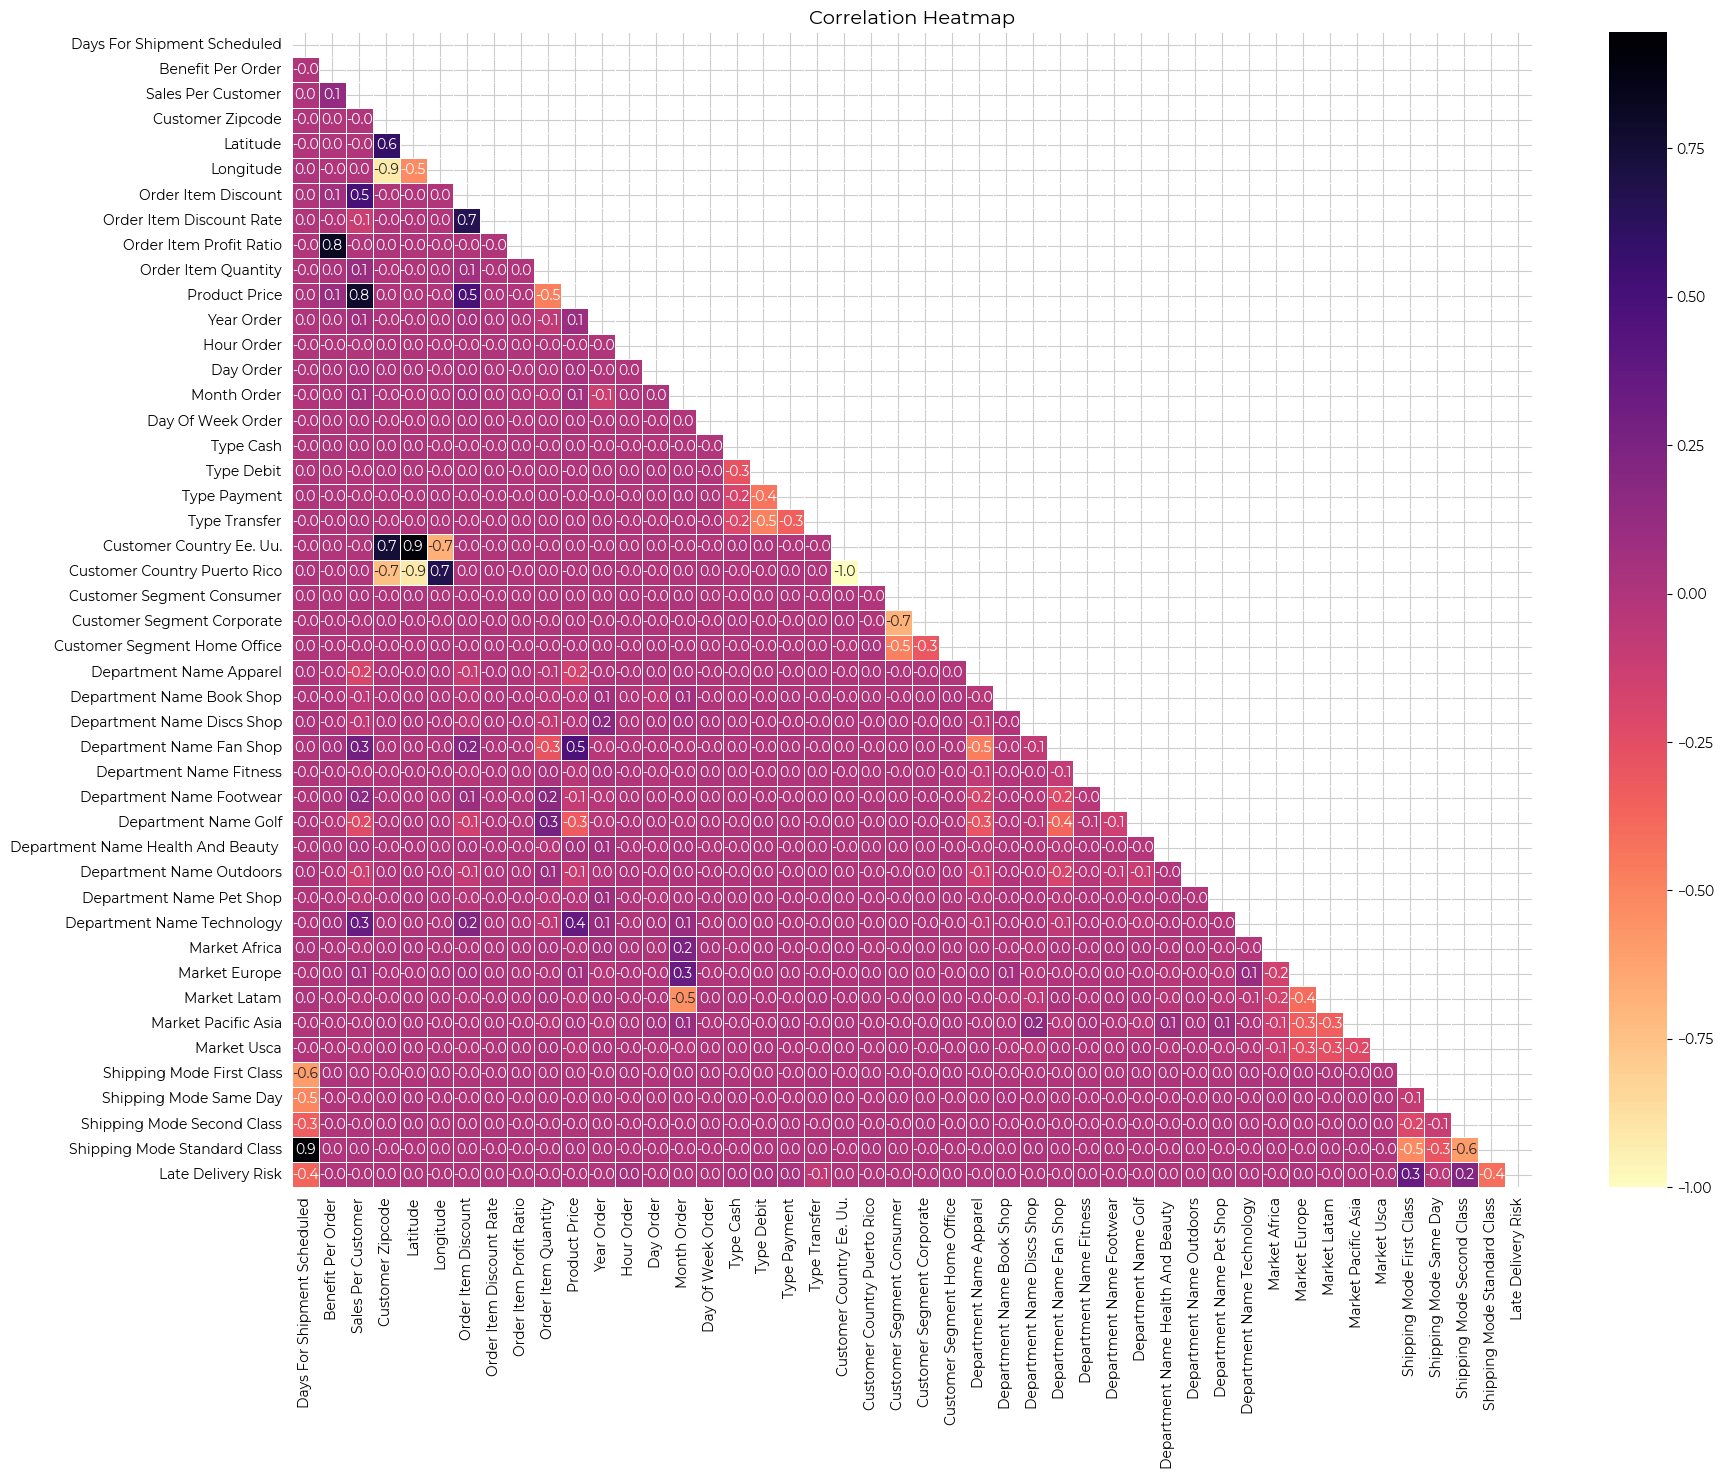

In [56]:
correlation_with_target_for_categorical = vis.corr_heatmap(df_ml)
correlation_with_target_for_categorical

The categorical columns one hot encoding have the better relation with the risk delivery that pure numerical features. The numerical categories have very low relationship and might be eliminated during the model training optimization

In [57]:
# Saving the dataframe for the ML analysis
df_ml.to_csv("../data/df_ml.csv", index=False)

<span style="color:red;">After finishing this notebook I recommend to check the `eda.ipynb` were the Exploratory Data Analysis is performed</span>